In [1]:
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


In [2]:
netflix_dataset = pd.read_csv("netflix.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
temp = netflix_dataset.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

,Columns,Missing values
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,506
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


In [5]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())

              Unique counts
show_id                7787
type                      2
title                  7787
director               4049
cast                   6831
country                 681
date_added             1565
release_year             73
rating                   14
duration                216
listed_in               492
description            7769


In [7]:
temp = netflix_dataset.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

,Columns,Missing values
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,506
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


In [8]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

Text(0.5, 1.0, 'TV Shows VS Movies')

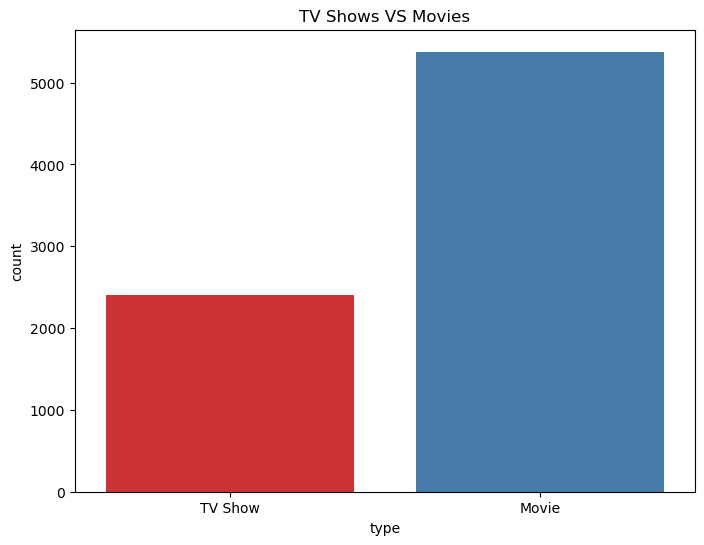

In [9]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = netflix_dataset,palette="Set1")
ax.set_title("TV Shows VS Movies")

In [10]:
netflix_date= netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #::-1 just reverse this nigga

<Axes: xlabel='year', ylabel='month'>

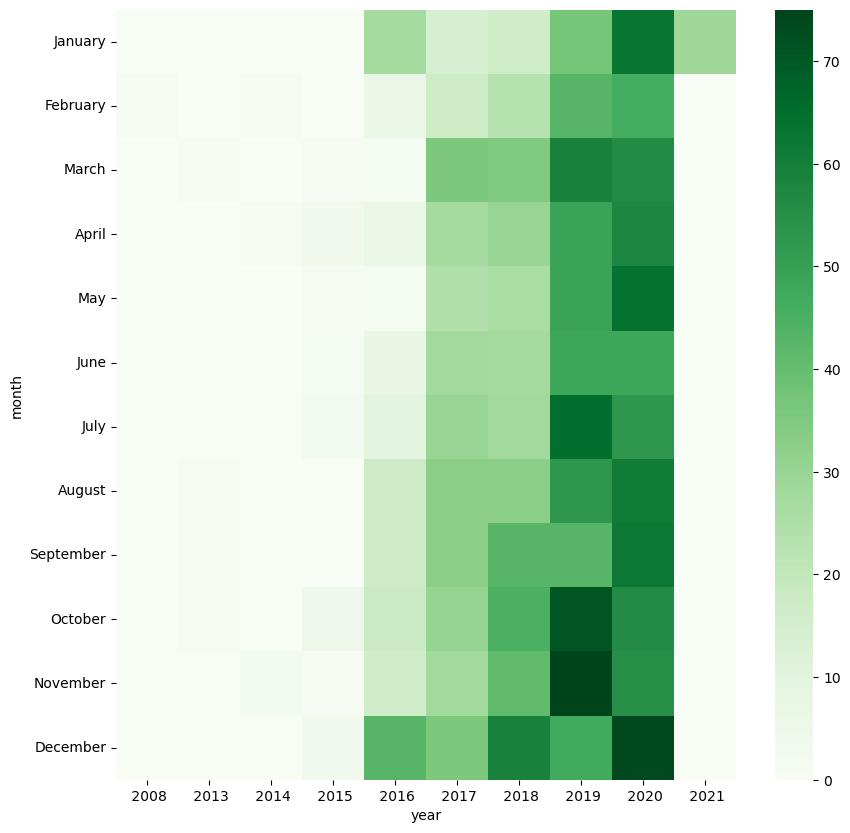

In [11]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.subplots(figsize=(10,10))
sns.heatmap(df,cmap='Greens') #heatmap

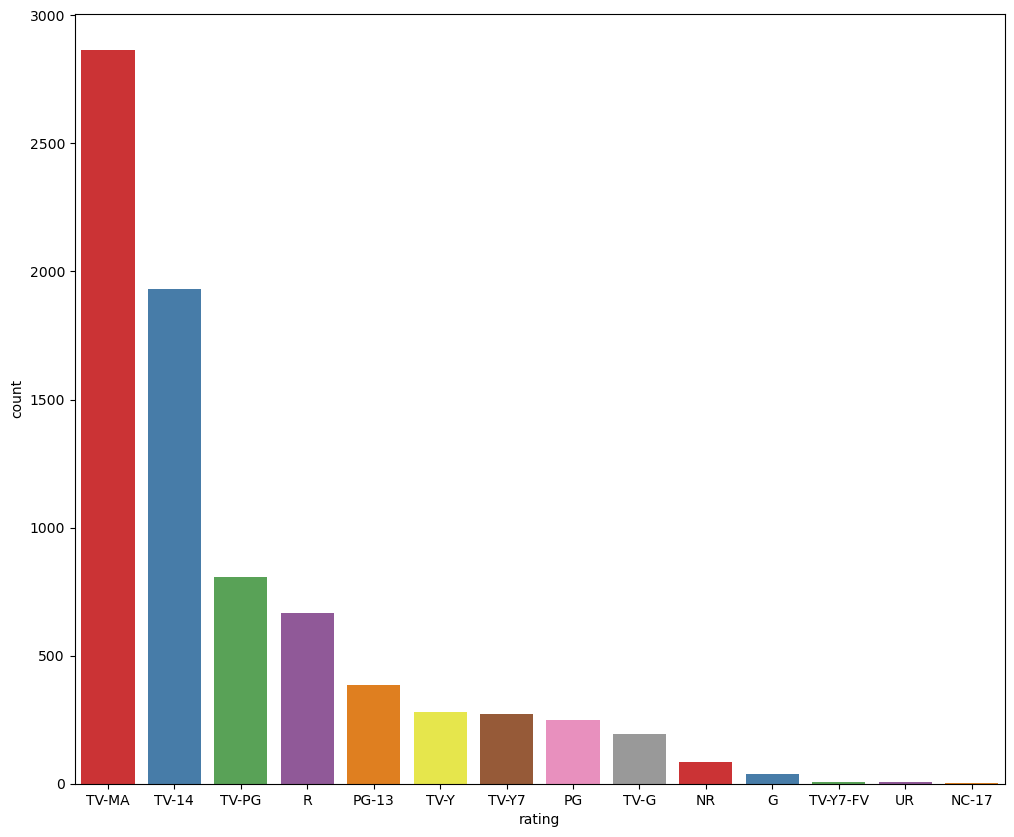

In [12]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix_dataset,palette="Set1",order=netflix_dataset['rating'].value_counts().index[0:15]) 

In [16]:
#Analysing IMDB ratings to get top rated movies on Netflix
imdb_ratings=pd.read_csv("IMDb ratings.csv", usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [17]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [18]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame({'Country': country_count.index, 'Shows': country_count.values})
topcountries=country_count[0:11]
topcountries

,Country,Shows
0,United States,799
1,India,702
2,United Kingdom,107
3,Canada,56
4,Philippines,50
5,Spain,40
6,South Korea,36
7,Indonesia,35
8,France,33
9,"United Kingdom, United States",31


In [19]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


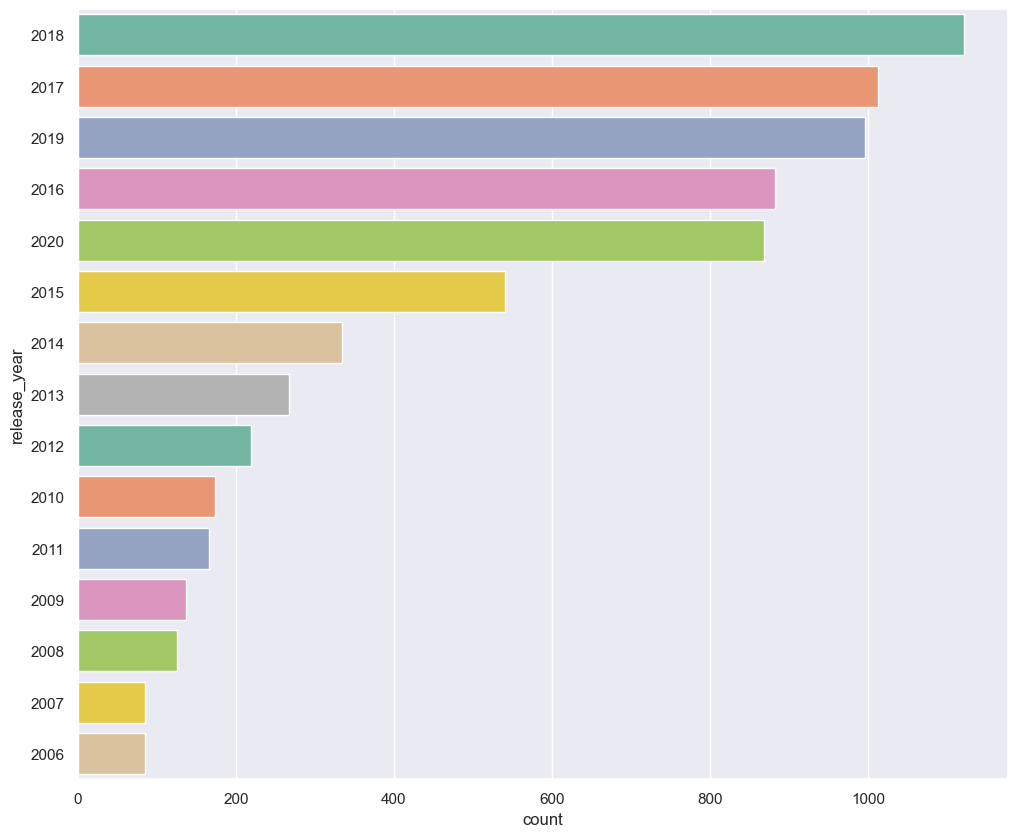

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set2", order=netflix_dataset['release_year'].value_counts().index[0:15])

In [21]:
countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [22]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Japan'),
 Text(4, 0, 'UnitedKingdom'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Italy')]

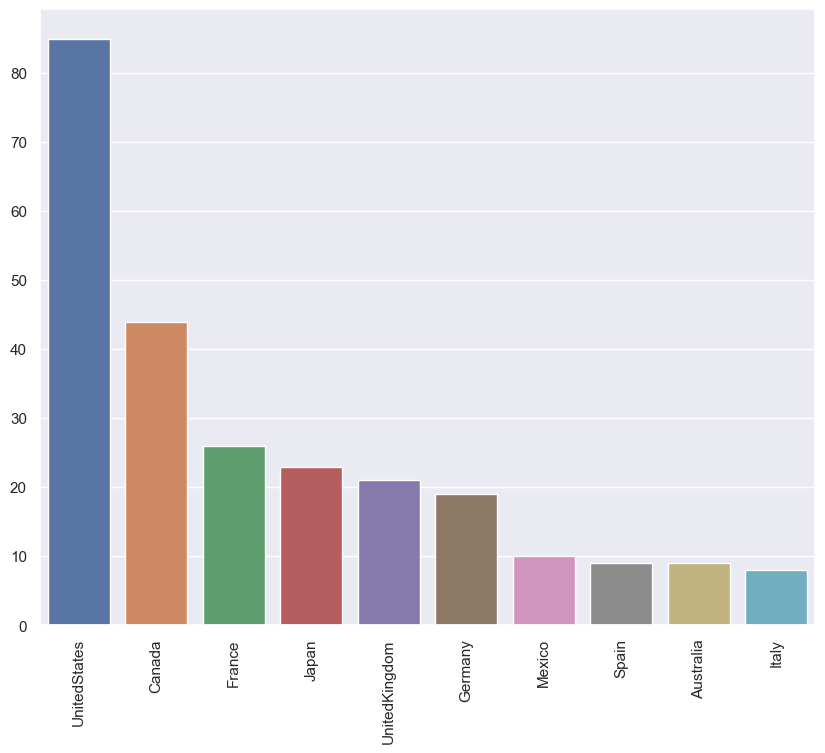

In [23]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

In [24]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

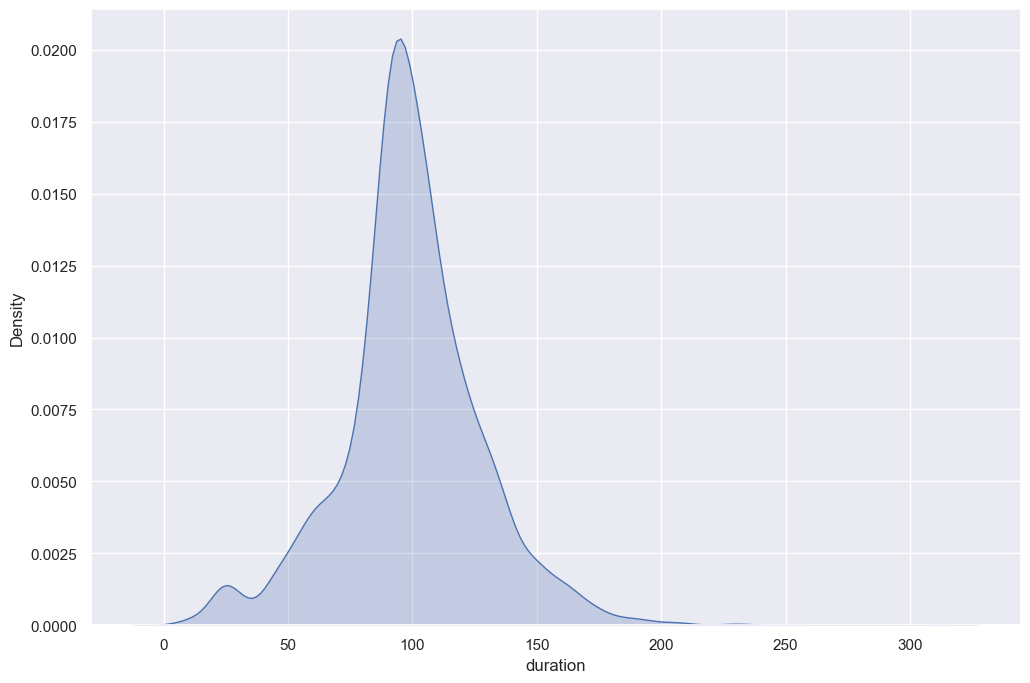

In [25]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [26]:
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [27]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [28]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

<Figure size 1000x800 with 0 Axes>

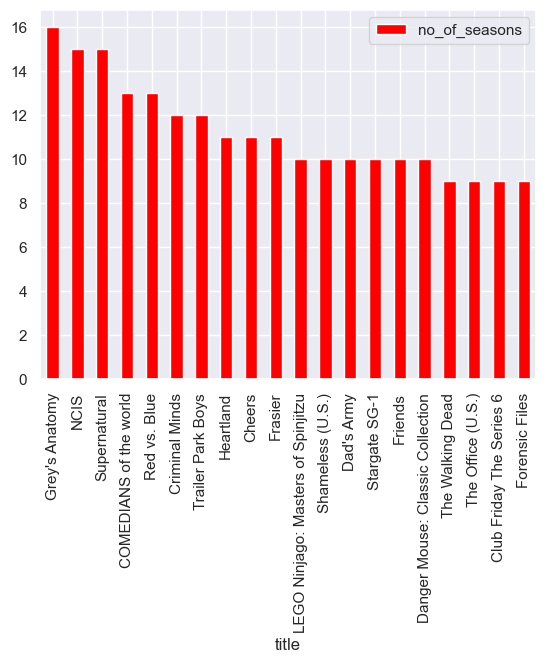

In [29]:
top20=top[0:20]
plt.figure(figsize=(10,8))
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [30]:
netflix_dataset['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [32]:
tfidf = TfidfVectorizer(stop_words='english')

In [33]:
netflix_dataset['description'] = netflix_dataset['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

In [34]:
tfidf_matrix.shape

(7787, 17905)

In [36]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [37]:
indices = pd.Series(netflix_dataset.index, index = netflix_dataset['title']).drop_duplicates()

In [38]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [39]:
get_recommendations('Black Panther')

3204                                      John Henry
7022                                      The Writer
1170                                            Cake
1628                           Daughters of the Dust
7606                           Who Killed Malcolm X?
6792                                The Pyramid Code
2304                                        Fugitiva
7189                              Transformers Prime
4406    Naruto Shippûden the Movie: The Will of Fire
2138                                        Fearless
Name: title, dtype: object

In [40]:
get_recommendations('3 Idiots')

1463                        College Romance
2005                      Engineering Girls
1197                              Candy Jar
4261                              Mr. Young
55      100 Things to do Before High School
4739                                 Pahuna
851                          Best Neighbors
777                              Be with Me
4171                            Moms at War
3790                               Lovesong
Name: title, dtype: object

In [41]:
filledna=netflix_dataset.fillna('')

In [42]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [43]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [44]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [45]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [47]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [49]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [50]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [51]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [52]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [56]:
pickle.dump(filledna, open('movies_list.pkl', 'wb'))
pickle.dump(cosine_sim2, open('similarity.pkl', 'wb'))

In [57]:
pickle.load(open('movies_list.pkl', 'rb'))

,index,title,director,cast,listed_in,description,soup
0,0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...,"3% joãomiguel,biancacomparato,michelgomes,rod..."
1,1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap...","07:19 jorgemichelgrau demiánbichir,héctorbonil..."
2,2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers...","23:59 gilbertchan teddchan,stellachung,henleyh..."
3,3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe...","9 shaneacker elijahwood,johnc.reilly,jenniferc..."
4,4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...,"21 robertluketic jimsturgess,kevinspacey,kateb..."
...,...,...,...,...,...,...,...
7782,7782,zozo,joseffares,"imadcreidi,antoinetteturk,eliasgergi,carmenleb...","dramas,internationalmovies","whenlebanon'scivilwardepriveszozoofhisfamily,h...","zozo joseffares imadcreidi,antoinetteturk,elia..."
7783,7783,zubaan,mozezsingh,"vickykaushal,sarah-janedias,raaghavchanana,man...","dramas,internationalmovies,music&musicals",ascrappybutpoorboywormshiswayintoatycoon'sdysf...,"zubaan mozezsingh vickykaushal,sarah-janedias,..."
7784,7784,zulumaninjapan,,nastyc,"documentaries,internationalmovies,music&musicals","inthisdocumentary,southafricanrappernastychits...","zulumaninjapan nastyc documentaries,internati..."
7785,7785,zumbo'sjustdesserts,,"adrianozumbo,rachelkhoo","internationaltvshows,realitytv",dessertwizardadrianozumbolooksforthenext“willy...,"zumbo'sjustdesserts adrianozumbo,rachelkhoo i..."
